### Dataset Details

This dataset has funding information of the Indian startups from January 2015 to August 2017. Dataset name - startup_funding_cn.csv

**Feature Details :**
- SNo - Serial number.
- Date - Date of funding in format DD/MM/YYYY.
- StartupName - Name of the startup which got funded.
- IndustryVertical - Industry to which the startup belongs.
- SubVertical - Sub-category of the industry type.
- CityLocation - City which the startup is based out of.
- InvestorsName - Name of the investors involved in the funding round.
- InvestmentType - Either Private Equity or Seed Funding.
- AmountInUSD - Funding Amount in USD.
- Remarks - Other information, if any.

In [384]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file = 'datasets/startup_funding_cn.csv'

In [385]:
df = pd.read_csv(file, encoding = 'utf-8', skipinitialspace=True)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [386]:
df.shape

(2372, 10)

In [387]:
#checking null values
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

Dataset has 2372 rows and 10 columns. There seems to be quite some null/nan values in the dataset. We will not remove or fill these values as of now. According to the insights that we want to extract, we will deal with the null values then.

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


##### Lets first find the total number of fundings done in each year, that means lets check the **trend of investments** over the years.

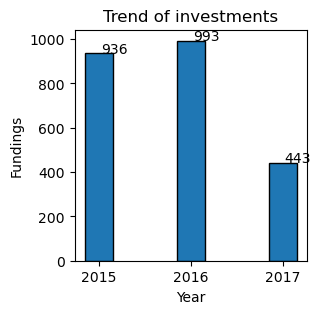

In [389]:
with open(file) as file_:
    reader = csv.DictReader(file_, skipinitialspace=True)
    
    year = []
    
    for row in reader:
        year.append(row['Date'][-4:])
        
np_year = np.array(year, dtype=int)
year, counts = np.unique(np_year, return_counts = True)

plt.figure(figsize=(3,3))
plt.bar(year, counts, edgecolor='black', width=0.3)
plt.title('Trend of investments')
plt.xlabel('Year')
plt.ylabel('Fundings')
for i in range(len(year)):
    plt.text(year[i]+0.02, counts[i]+0.01, counts[i])
plt.show()

In [390]:
print("{:<7} {:<10}".format('Year','No. of fundings'))
for i in range(len(year)):
    print("{:<12} {:<10}".format(year[i], counts[i]))

Year    No. of fundings
2015         936       
2016         993       
2017         443       


##### The dataset contains various Indian cities. Now lets find out which cities are generally chosen for starting a startup. We will look for the top 8 cities.

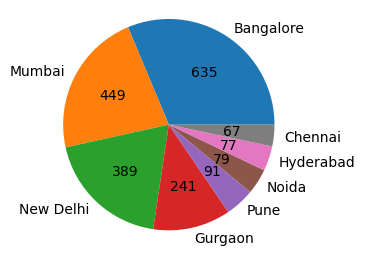

In [391]:
#I will create copies of the dataset so that the original dataset does not gets disturbed.
data = df.copy()
data.dropna(subset=["CityLocation"], inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

data['CityLocation'] = data['CityLocation'].apply(separateCity)
data['CityLocation'].replace("Delhi","New Delhi",inplace = True)
data['CityLocation'].replace("bangalore","Bangalore",inplace = True)

city = data['CityLocation'].value_counts()[:8]
cityName = city.index
cityCount = city.values

def absolute_value(val):
    a  = np.round(val/100*cityCount.sum(), 0)
    return int(a)

plt.figure(figsize=(3,3))
plt.pie(cityCount, labels = cityName, autopct = absolute_value, radius = 1.5)
plt.axis('equal')
plt.show()

In [392]:
print("{:<12} {:<10}".format('City','No. of startups'))
for i in range(cityName.shape[0]):
    print("{:<17} {:<10}".format(cityName[i], cityCount[i]))

City         No. of startups
Bangalore         635       
Mumbai            449       
New Delhi         389       
Gurgaon           241       
Pune              91        
Noida             79        
Hyderabad         77        
Chennai           67        


##### We just had a look on which cities have more startups than others. Now lets take a look at the funding amounds received by the cities and how it varies. Again, we will take the top 8 cities. ~ amount is in USD.

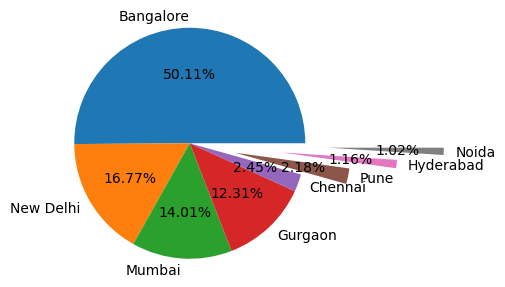

In [393]:
#I am continuing to use the dataframe used in the previous insight as here also we are looking at city location.
def replacing(x):
    return float(str(x).replace(',', ''))
    
data['AmountInUSD'] = data['AmountInUSD'].apply(replacing)
test = data.groupby('CityLocation')['AmountInUSD'].sum()
test.sort_values(ascending=False, inplace=True)
city = test.index[:8]
amount = test.values[:8]

plt.figure(figsize=(3,3))
explode = [0,0,0,0,0,0.5,1,1.5]
plt.pie(amount, labels = city, autopct = '%.2f%%', explode=explode, radius = 1.25)
plt.show()

In [394]:
x = np.true_divide(amount, amount.sum())*100
print("{:<12} {:<17} {:<10}".format('City','Funding Amount', '% of funding amount'))
for i in range(city.shape[0]):
    print("{:<12} {:<24} {:<10}".format(city[i], "$" + str(amount[i]), format(x[i], '.2f')))

City         Funding Amount    % of funding amount
Bangalore    $8422974108.0            50.11     
New Delhi    $2818247500.0            16.77     
Mumbai       $2354934500.0            14.01     
Gurgaon      $2069021500.0            12.31     
Chennai      $411105000.0             2.45      
Pune         $366653000.0             2.18      
Hyderabad    $195362000.0             1.16      
Noida        $170638000.0             1.02      


##### Now lets have a look at the investment types.

In [395]:
#taking a fresh copy of dataset
data = df.copy()
data.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

##### I can see broadly 4 investment types. I will correct the spelling mistakes first and then we will find out percentage of amount funded for each investment type.

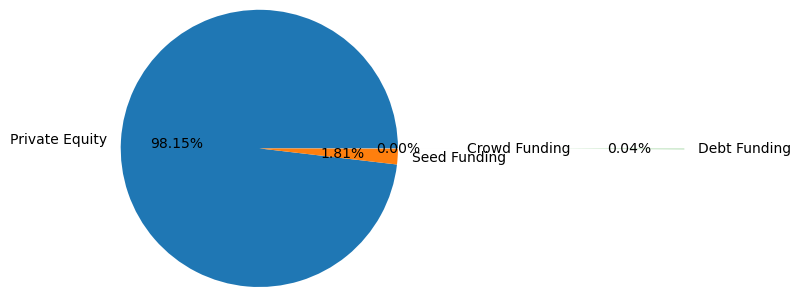

In [396]:
data.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
data.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
data.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)

def replacing(x):
    return float(str(x).replace(',', ''))
    
data['AmountInUSD'] = data['AmountInUSD'].apply(replacing)
test = data.groupby('InvestmentType')['AmountInUSD'].sum()
test = test.sort_values(ascending=False)
inType = test.index
amount = test.values

explode = [0, 0, 3.1, 0.6]
plt.figure(figsize=(3,3))
plt.pie(amount, labels = inType, autopct = '%.2f%%', radius=1.5, explode = explode)
plt.show()

In [397]:
x = np.true_divide(amount, amount.sum())*100
print("{:<17} {:<17} {:<10}".format('Investment Type','Funding Amount', '% of funding amount'))
for i in range(inType.shape[0]):
    print("{:<17} {:<22} {:<10}".format(inType[i], "$"+str(amount[i]), format(x[i], '.5f')))

Investment Type   Funding Amount    % of funding amount
Private Equity    $18007085000.0         98.14523  
Seed Funding      $332345708.0           1.81141   
Debt Funding      $7800000.0             0.04251   
Crowd Funding     $155768.0              0.00085   


##### There are a lot of startups in the dataset and these startups belong to some industry. Lets find out which type of companies got more easily funding. That means lets look at which industries get fundings more easily.

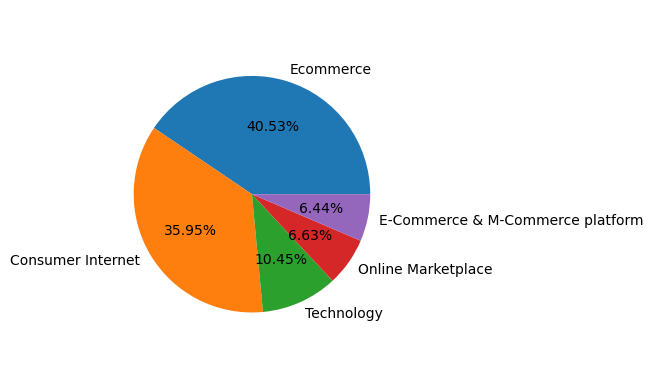

In [398]:
data.IndustryVertical.replace('eCommerce', 'Ecommerce', inplace = True)
data.IndustryVertical.replace('ECommerce', 'Ecommerce', inplace = True)
data.IndustryVertical.replace('ecommerce', 'Ecommerce', inplace = True)
test = data.groupby('IndustryVertical')['AmountInUSD'].sum()
test = test.sort_values(ascending=False)[:5]
inType = test.index
amount = test.values

plt.pie(amount, labels = inType, autopct = '%.2f%%', radius=0.8)
plt.show()

In [399]:
x = np.true_divide(amount, amount.sum())*100
print("{:<35} {:<17} {:<10}".format('Industry Type','Funding Amount', '% of funding amount'))
for i in range(inType.shape[0]):
    print("{:<35} {:<22} {:<10}".format(inType[i], "$"+str(amount[i]), format(x[i], '.2f')))

Industry Type                       Funding Amount    % of funding amount
Ecommerce                           $4281189608.0          40.53     
Consumer Internet                   $3797089000.0          35.95     
Technology                          $1103593500.0          10.45     
Online Marketplace                  $700000000.0           6.63      
E-Commerce & M-Commerce platform    $680000000.0           6.44      


##### Wow, that is exciting. We came across three insights about the dataset till now.
1. Bangalore is the city which has received most number of fundings as well as the most amount.
2. Private Equity funding is the most common type of investment and has dominated the field with over 98% investments.
3. Ecommerce and Consumer Internet are the top 2 industries that receive most funding amount.

##### Lets extract more insights from the data. Lets now find the top 8 startups with most amount of total funding and most funding rounds.

In [400]:
#checking for duplicate names and spelling mistakes
for i in range(data.StartupName.shape[0]):
    if ('oyo' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('rooms' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Rooms' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Oyo' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Paytm' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Ola' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('ola' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('flipkart' in data.StartupName[i]):
        print(data.StartupName[i])
    elif ('Flipkart' in data.StartupName[i]):
        print(data.StartupName[i])

Vista Rooms
Ola
Flipkart
Ola
Paytm
Ola Cabs
HolaChef
Oyo Rooms
Ola
Paytm Marketplace
Flipkart
Oriano Solar
Flipkart
FroyoFit
OyoRooms
Paytm
HolaChef
Truckola
SolarTown
Oyo
RoomsTonite
Kolabro
Deyor Rooms
Ola
HolaChef
Ola Cabs
Ola Cabs
Paytm
Oyorooms
Zo Rooms
EzySolare
Ola Cabs
Oyo Rooms
Zo Rooms
Flipkart.com
Flipkart
Applied Solar Technologies
Holachef
Olacabs
Paytm
OYO Rooms
HolaChef
Paytm


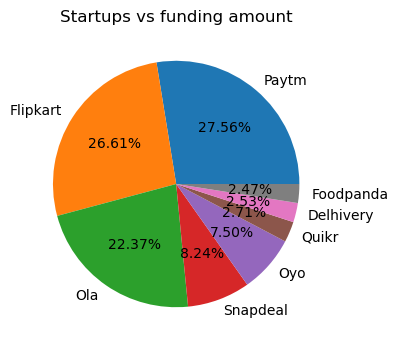

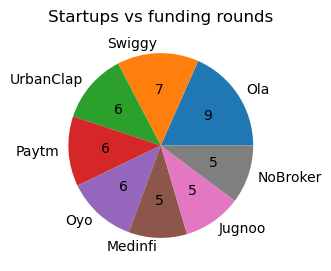

In [401]:
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
test = data.groupby('StartupName')['AmountInUSD'].sum()
test = test.sort_values(ascending=False)[:8]
test1 = data.StartupName.value_counts()[:8]
name = test.index
amount = test.values
name1 = test1.index
rounds = test1.values

plt.figure(figsize=(4,4))
plt.pie(amount, labels = name, autopct = '%.2f%%', radius = 1)
plt.title('Startups vs funding amount')
plt.show()

def absolute_value(val):
    a  = np.round(val/100*rounds.sum())
    return int(a)

plt.figure(figsize=(3,3))
plt.pie(rounds, labels = name1, autopct = absolute_value, radius = 1)
plt.title('Startups vs funding rounds')
plt.show()

In [402]:
x = np.true_divide(amount, amount.sum())*100
print("{:<15} {:<17} {:<10}".format('Startup Name','Funding Amount', '% of funding amount'))
for i in range(name.shape[0]):
    print("{:<15} {:<22} {:<10}".format(name[i], "$"+str(amount[i]), format(x[i], '.2f')))

print()
print("{:<15} {:<17}".format('Startup Name','Funding Rounds'))
for i in range(name.shape[0]):
    print("{:<20} {:<22}".format(name1[i], rounds[i]))

Startup Name    Funding Amount    % of funding amount
Paytm           $2340000000.0          27.56     
Flipkart        $2259700000.0          26.61     
Ola             $1899500000.0          22.37     
Snapdeal        $700000000.0           8.24      
Oyo             $637000000.0           7.50      
Quikr           $230000000.0           2.71      
Delhivery       $215000000.0           2.53      
Foodpanda       $210000000.0           2.47      

Startup Name    Funding Rounds   
Ola                  9                     
Swiggy               7                     
UrbanClap            6                     
Paytm                6                     
Oyo                  6                     
Medinfi              5                     
Jugnoo               5                     
NoBroker             5                     


##### Very well, we have extracted some insights from the data. Lets say that you are launching a product startup and need help in some areas. I can help answer your questions. Starting with, if you wish to launch a product startup, which will be the most suitable city.

We can see that Bangalore is the city which has the most number of startups as well as the most funding amount. But what if we club New Delhi, Gurgaon, and Noida as NCR, and then look at the number of fundings.

In [403]:
#a fresh dataset copy
data = df.copy()

City       Startups     Funding amount   
NCR          709        $8422974108.0    
Bangalore    635        $5057907000.0    
Mumbai       449        $2354934500.0    
Pune         91         $411105000.0     
Hyderabad    77         $366653000.0     


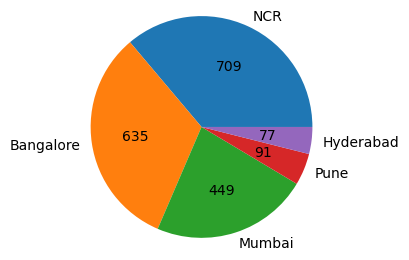

In [404]:
#dropping the null values in accordance to CityLocation
data.dropna(subset=['CityLocation'], inplace=True)
data.reset_index(drop=True, inplace=True)

#separating the multiple location startups
def separateCity(city):
    return city.split('/')[0].strip()

data.CityLocation = data.CityLocation.apply(separateCity)

def replacing(x):
    return float(str(x).replace(',', ''))
    
data['AmountInUSD'] = data['AmountInUSD'].apply(replacing)

#correcting the names of cities and clubbing delhi, noida and gurgaon as delhi ncr.
data.CityLocation.replace('bangalore', 'Bangalore', inplace=True)
data.CityLocation.replace('Delhi', 'New Delhi', inplace=True)
data.CityLocation.replace('New Delhi', 'NCR', inplace=True)
data.CityLocation.replace('Noida', 'NCR', inplace=True)
data.CityLocation.replace('Gurgaon', 'NCR', inplace=True)

#using value_counts() to check the city with most startups and funding amount
test = data.groupby('CityLocation')['AmountInUSD'].sum()
test = test.sort_values(ascending=False)
result = data.CityLocation.value_counts()[:5]
city = result.index
count = result.values
amount = test.values[:5]

#printing the output
print("{:<10} {:<12} {:<17}".format('City','Startups', 'Funding amount'))
for i in range(city.shape[0]):
    print("{:<12} {:<10} {:<17}".format(city[i], count[i], "$"+str(amount[i])))

#plotting a pie graph
def absolute_value(x):
    x = np.round(x/100*count.sum())
    return int(x)

plt.figure(figsize=(3,3))
plt.pie(count, labels=city, autopct=absolute_value, radius = 1.2)
plt.show()

##### If we club New Delhi, Gurgaon, and Noida as NCR, then we get to know that NCR has received more fundings altogether.

##### After you have chose a suitable city for establishing your product startup, now you will have to seek investment opportunities. To help you with it, let me help you find the top investors who have invested maximum number of times.

In [405]:
data = df.copy()

In [406]:
#dropping the null values in accordance to InvestorsName
data.dropna(subset=['InvestorsName'], inplace=True)
data.reset_index(drop=True, inplace=True)

#separating the multiple investors in one startup and storing in a list
investors = []

def separateInvestors(x):
    investors.append(x.split(','))

data.InvestorsName.apply(separateInvestors)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestorsName.head()

#counting the freq and storing it in a dict
di = {}
for i in investors:
    for j in i:
        if j!="":
            j = j.strip()
            di[j] = di.get(j, 0) + 1
        
#sorting the dict and printing the result
di_keys = sorted(di, key=di.get, reverse=True)
inNames = []
freq = []
print("{:<20} {:<17}".format('Investor Name','Investment Rounds'))
for i in range(8):
    inNames.append(di_keys[i])
    freq.append(di[di_keys[i]])
    print("{:<28} {:<17}".format(di_keys[i], di[di_keys[i]]))

Investor Name        Investment Rounds
Sequoia Capital              64               
Accel Partners               53               
Kalaari Capital              44               
SAIF Partners                41               
Indian Angel Network         40               
Blume Ventures               39               
Undisclosed Investors        33               
Ratan Tata                   30               


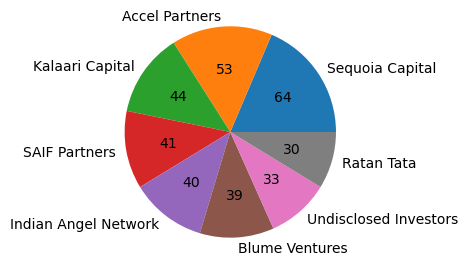

In [407]:
#plotting a pie graph
def absolute_value(x):
    x = np.round(x/100*sum(freq))
    return int(x)

plt.figure(figsize=(3,3))
plt.pie(freq, labels=inNames, autopct=absolute_value)
plt.axis('equal')
plt.show()

##### This may help your startup in getting the right investment but this insight has a slight problem, that is some investors have invested in the same startup at different number of funding rounds. Let me help you find top investors who have invested maximum number of times in different companies.

In [408]:
data = df.copy()

In [409]:
#dropping the null values in accordance to InvestorsName, StartupName
data.dropna(subset=['InvestorsName', 'StartupName'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [410]:
#checking duplicate names
# for i in range(data.StartupName.shape[0]):
#     if ('oyo' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('rooms' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('Rooms' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('Oyo' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('Paytm' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('Ola' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('ola' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('flipkart' in data.StartupName[i]):
#         print(data.StartupName[i])
#     elif ('Flipkart' in data.StartupName[i]):
#         print(data.StartupName[i])
        
#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']

#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

In [411]:
#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [412]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kae Capital,TouchKin
1,Triton Investment Advisors,Ethinos
2,Kashyap Deorah,Leverage Edu
3,Anand Sankeshwar,Leverage Edu
4,Deepak Jain,Leverage Edu


In [413]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
print("{:<20} {:<17}".format('Investor Name','Investment Rounds'))
for i in range(data.shape[0]):
    print("{:<28} {:<17}".format(data.index[i],data.values[i]))
    name.append(data.index[i])
    count.append(data.values[i])

Investor Name        Investment Rounds
Sequoia Capital              48               
Accel Partners               47               
Kalaari Capital              41               
Indian Angel Network         40               
Blume Ventures               36               


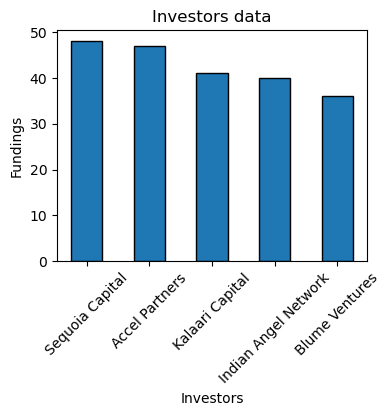

In [414]:
#plotting a bar graph for the same
plt.figure(figsize=(4,3))
plt.bar(name, count, width = 0.5, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Investors data')
plt.xlabel('Investors')
plt.ylabel('Fundings')
plt.show()

##### Inorder to select the right investor, it is important to choose the right investment. Since your startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Let me help you find the top investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.

In [415]:
data = df.copy()

In [416]:
#dropping the null values in accordance to InvestorsName, StartupName, and InvestmentType
data.dropna(subset=['InvestorsName', 'StartupName', 'InvestmentType'], inplace=True)
data.reset_index(drop=True, inplace=True)

#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
data.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
data.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)

#updating the df with only Crowd Funding and Seed Funding investments
data = data[(data.InvestmentType == 'Crowd Funding')|(data.InvestmentType == 'Seed Funding')]

#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [417]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kashyap Deorah,Leverage Edu
1,Anand Sankeshwar,Leverage Edu
2,Deepak Jain,Leverage Edu
3,Sadashiva NT,Leverage Edu
4,Arjun Mehta,Leverage Edu


In [418]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
print("{:<25} {:<17}".format('Investor Name', 'Investment Rounds'))
for i in range(data.shape[0]):
    print("{:<33} {:<17}".format(data.index[i],data.values[i]))
    name.append(data.index[i])
    count.append(data.values[i])

Investor Name             Investment Rounds
Indian Angel Network              33               
Rajan Anandan                     23               
LetsVenture                       16               
Anupam Mittal                     16               
Group of Angel Investors          14               


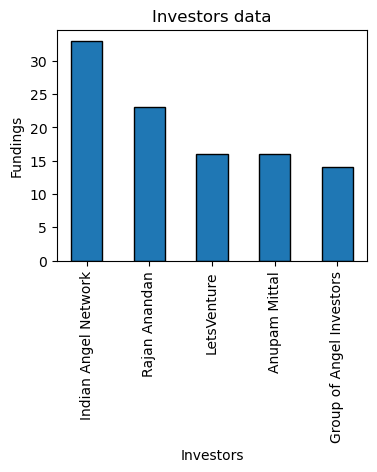

In [419]:
#plotting a bar graph for the same
plt.figure(figsize=(4,3))
plt.bar(name, count, width = 0.5, edgecolor='black')
plt.xticks(rotation=90)
plt.title('Investors data')
plt.xlabel('Investors')
plt.ylabel('Fundings')
plt.show()

##### After all these insights, your startup would have successfully got funding and will be on operational mode. Now that your startup is in growth stage, lets me help you find private equity investment opportunities. With this information, you can look for best suited investment opportunity for your startup. 

In [420]:
data = df.copy()

In [421]:
#dropping the null values in accordance to InvestorsName, StartupName, and InvestmentType
data.dropna(subset=['InvestorsName', 'StartupName', 'InvestmentType'], inplace=True)
data.reset_index(drop=True, inplace=True)

#updating duplicate names and spellings
data.replace('Oyo Rooms', 'Oyo', inplace=True)
data.replace('Paytm Marketplace', 'Paytm', inplace=True)
data.replace('Ola Cabs', 'Ola', inplace=True)
data.replace('Olacabs', 'Ola', inplace=True)
data.replace('OyoRooms', 'Oyo', inplace=True)
data.replace('Oyorooms', 'Oyo', inplace=True)
data.replace('OYO Rooms', 'Oyo', inplace=True)
data.replace('Flipkart.com', 'Flipkart', inplace=True)
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
data.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
data.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
data.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)

#updating the df with only Private Equity investments
data = data[(data.InvestmentType == 'Private Equity')]

#separating the multiple investors in one startup and storing in a list
def separateInvestors(x):
    return x.split(',')

data.InvestorsName = data.InvestorsName.apply(separateInvestors)

In [422]:
#making two lists where every index will correspond to investorName and startupName
investor_name = []
startup_name = []

for index,row in data.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    for j in s:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

In [423]:
#updating the df data with the lists made above
data = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
data.head()

,InvestorsName,StartupName
0,Kae Capital,TouchKin
1,Triton Investment Advisors,Ethinos
2,Infuse Ventures,Ecolibriumenergy
3,JLL,Ecolibriumenergy
4,Asset Management (Asia) Ltd,Droom


In [424]:
#grouping the data using nunique() which returns df with counts of unique elements in each position.
#sorting the df in descending order and printing the result.
data = data.groupby('InvestorsName')['StartupName'].nunique()
# print(data.head(10))
data = data.sort_values(ascending = False)[:5]

name = []
count = []
print("{:<20} {:<17}".format('Investor Name', 'Investment Rounds'))
for i in range(data.shape[0]):
    print("{:<27} {:<17}".format(data.index[i],data.values[i]))
    name.append(data.index[i])
    count.append(data.values[i])

Investor Name        Investment Rounds
Sequoia Capital             45               
Accel Partners              43               
Kalaari Capital             35               
Blume Ventures              27               
SAIF Partners               24               


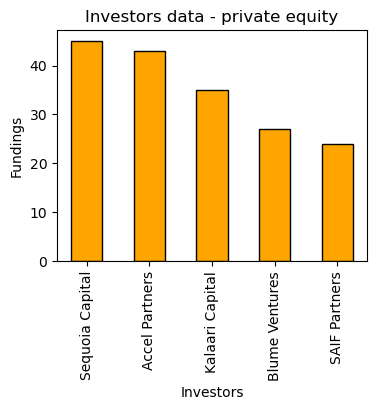

In [425]:
#plotting a bar graph for the same
plt.figure(figsize=(4,3))
plt.bar(name, count, width = 0.5, edgecolor='black', color = 'orange')
plt.xticks(rotation=90)
plt.title('Investors data - private equity')
plt.xlabel('Investors')
plt.ylabel('Fundings')
plt.show()

    
                                                                                case study analysis by Yagay Khatri